# Analysis
This is a jupyter notebook for analyzing the Hamming Weight distribution of balanced and unbalanced arithmetic

## Utility definitions
This next code area contains functions that I use frequently for utility and convenience

In [30]:
import matplotlib.pyplot as plt
import numpy as np

wordsize = 8

def bit_not(n, numbits = wordsize):
    return (1 << numbits) - 1 - n

def hammingWeight(val):
    weight = 0
    while val != 0:
        weight += val & 1
        val >>= 1
    return weight

def cycle_left(x, i=1):
    for i in range(i):
        dropping_bit = x & (1<<wordsize-1)
        x <<= 1
        x |= dropping_bit >> wordsize-1
    filter = (2<<wordsize) -1
    x &= filter
    return x

def cycle_right(x, i=1):
    for i in range(i):
        dropping_bit = x & 1
        x >>= 1
        x |= dropping_bit << wordsize -1
    filter = (2<<wordsize) - 1
    x &= filter
    return x

def getWeightDistributionUnbalanced(operation):
    weights = np.zeros((wordsize+1))
    for v1 in range(1<<wordsize):
        for v2 in range(1<<wordsize):
            w = hammingWeight(operation(v1, v2))
            weights[w] += 1
        
    return weights

def getWeightDistributionBalanced(operation):
    weights = np.zeros((2*wordsize + 2))
    for v1 in range(1<<wordsize):
        x1 = v1 << 3*wordsize | bit_not(v1)
        for v2 in range(1<<wordsize):
            x2 = v2 << 3*wordsize | bit_not(v2)
            w = hammingWeight(operation(x1, x2))
            weights[w] += 1
    return weights

## Hamming Weight distribution of values
Distribution of the Hamming Weight of all possible values for an 8bit word.
### Unbalanced

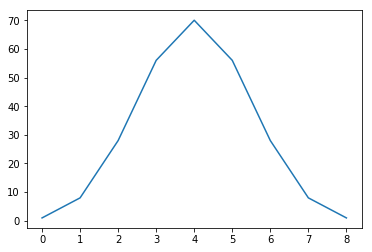

In [20]:
weights = np.zeros((wordsize+1))
for i in range(1<<wordsize):
    w = hammingWeight(i)
    weights[w] += 1
plt.plot(weights)
plt.show()

### Balanced
(Just for completeness and checking my code)

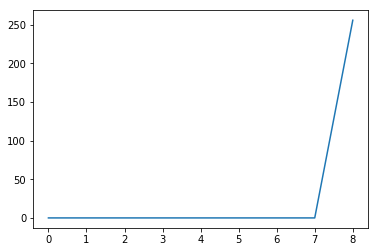

In [19]:
weights = np.zeros((wordsize+1))
for i in range(1<<wordsize):
    w = hammingWeight(i) + hammingWeight(bit_not(i))
    weights[w] += 1
plt.plot(weights)
plt.show()

## Operations
Here I will analyze the distribution of operation results, both for unbalanced and for balanced arithmetic.
For balanced arithmetic I will have to check all intermediate results, splitting the complete expression into subexpressions.

### Or
#### Unbalanced

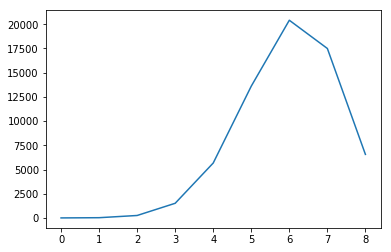

In [31]:
w = getWeightDistributionUnbalanced(lambda x,y: x|y)
plt.plot(w)
plt.show()

#### Balanced

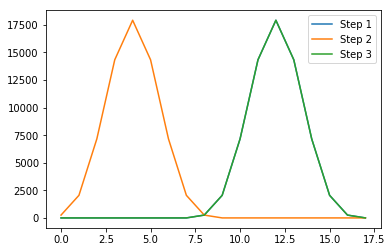

In [26]:
w = getWeightDistributionBalanced(lambda x,y: x|y)
plt.plot(w, label="Step 1")

w = getWeightDistributionBalanced(lambda x,y: x&y)
plt.plot(w, label="Step 2")

w = getWeightDistributionBalanced(lambda x,y: x|y | (x&y>>wordsize))
plt.plot(w, label="Step 3")

plt.legend()
plt.show()